**Good morning everyone**

Today is last day for this workshop 

Verify your personal details and attendance 

if you have any queries ask before start session or after end of session.

#### You have exam today at 06:45 PM to 07:15PM
#### All of you get exam links before 06:00 PM today


### Today concept
* Dimensionality Reduction
    * Applying PCA(Principal Component Analysis)

### Dimensionality Reduction
    Reduction of the dimensions of the features is called dimensionality reduction
    
    1. Feature elimination
    2. Feature Extraction

**Feature Elimination**
    means removing less important columns and taking only remaining columns is called feature elimination

**Feature Extraction**
    we create new independent columns where each new variable is a combination of the old columns

**Advantage of feature extraction**
1. by combining the features we can not loose information
2. by reducing the features your model able to work well

**Principal Component Analysis**

it is the technique for the feature extraction

each of the new independed variables are the principal components

**Now we apply PCA for the breast cancer data set and observe with and without PCA how the model is working**

**without applying PCA**

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.06880,0.02564,0.3105,0.07409,1
422,11.610,16.02,75.46,408.2,0.10880,0.11680,0.07097,0.044970,0.1886,0.06320,...,19.67,81.93,475.7,0.1415,0.2170,0.23020,0.11050,0.2787,0.07427,1
295,13.770,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.019170,0.1592,0.05912,...,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794,1
509,15.460,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,...,36.33,117.70,909.4,0.1732,0.4967,0.59110,0.21630,0.3013,0.10670,0
472,14.920,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.032210,0.1687,0.05669,...,18.22,112.00,906.6,0.1065,0.2791,0.31510,0.11470,0.2688,0.08273,1


**2. Pre-processing**

How many rows and columns in this dataset?

In [9]:
df.shape

(569, 31)

In [10]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

**Train the model**

In [12]:
X = df.drop('target',axis=1)
y = df['target']

we are using Logistic Regression algorithm

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print('score',model.score(X,y)*100)

score 95.95782073813707


**Now we apply PCA**

In [17]:
import pandas as pd

In [18]:
from sklearn.datasets import load_breast_cancer

In [19]:
data = load_breast_cancer()
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**2. Pre-processing**

In [21]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**we have to scale the data of all the features**

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scalerObj = StandardScaler()

transform the data

X_transformed = scaler.fit_transform(Features)

In [28]:
X = df.drop('target',axis=1)
y = df['target']

In [30]:
X_transformed = scalerObj.fit_transform(X)

In [22]:
# 1. import the PCA
from sklearn.decomposition import PCA

In [24]:
# create the object
pcaObj = PCA(n_components=2)

In [25]:
# newFeatures = pcaObj.fit_transform(X_features_scaled)

In [31]:
newFeatures = pcaObj.fit_transform(X_transformed)

In [32]:
pcaDf = pd.DataFrame(newFeatures,columns = ['PCA1','PCA2'])
pcaDf.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


**How much information carried from actual 30 features to the 2 new features**

In [33]:
pcaObj.explained_variance_ratio_*100

array([44.27202561, 18.97118204])

In [34]:
sum(pcaObj.explained_variance_ratio_*100)

63.24320765155949

**Visualize the data with the help of target**

In [36]:
pcaDf.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [37]:
pcaDf['target'] = y
pcaDf.head(2)

,PCA1,PCA2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0


**how to filter the cancer data and non cancer?**

In [38]:
mask1 = pcaDf['target'] == 1
cancer_df = pcaDf[mask1]
cancer_df.head()

,PCA1,PCA2,target
19,-1.237063,-0.188215,1
20,-1.578161,0.572808,1
21,-3.557336,1.662950,1
37,-3.749313,-1.413473,1
46,-4.581937,1.484220,1


In [39]:
mask2 = pcaDf['target'] == 0
non_cancer_df = pcaDf[mask2]
non_cancer_df.head()

,PCA1,PCA2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [40]:
import matplotlib.pyplot as plt

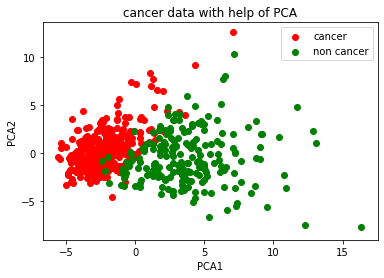

In [41]:
plt.figure()

plt.scatter(cancer_df['PCA1'],cancer_df['PCA2'],c='red',label='cancer')

plt.scatter(non_cancer_df['PCA1'],non_cancer_df['PCA2'],c='green',label='non cancer')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('cancer data with help of PCA')
plt.legend()
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
X = pcaDf.drop('target',axis=1)
y = pcaDf['target']

In [44]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
print('score',model.score(X,y)*100)

score 95.43057996485061


**How to save the model and how to reuse the saved model**

we apply KNN algorithm for fruits data set and save the model for future purpose

In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('fruit_data_with_colours.csv')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [48]:
X = df[['mass','width','height']]
y = df['fruit_label']

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [51]:
print('score',model.score(X,y)*100)

score 81.35593220338984


**for saving model**

In [52]:
import pickle

pickle.dump(algorithm model,   file object)

In [53]:
pickle.dump(model, open('fruitsModel.pkl','wb'))

**for reusing model**

In [54]:
import pickle

pickle.load(file object)

In [55]:
model = pickle.load(open('fruitsModel.pkl','rb'))

In [57]:
model.predict([[192,8.4,7.3]])

array([1], dtype=int64)

**Day-1**
    * Introduction to ML
    * Types ML
    * Applications
    * different algorithms
    * steps required to solve the problem with help of ML

**Day-2**
    * Linear Regression algorithm 
    * salary prediction
    * reliance revenue prediction

**Day-3**
    1. Multi Linear Regression
        boston dataset
    2. Polynomial Regression
        salary prediction

**Day-4**
    1. K-Nearest neibours classifier
        fruits data and iris data

**Day-5**
   *  Logistic regression
        heart disease
   * Support Vector Machine

**Day-6**
       1. Decision Tree Classifier
       2. Decision Tree Regressor
           fruits dataset
           Automobile

**Day-7**
    1. Random Forest
           birds dataset

**Day-8**
     1. K-Means algorithm
         iris dataset

**Day-9**
   1. Dimensionality Reduction
        PCA
            breaset cancer dataset
   2. pickle module to save and read the machine leanring models

**Kaggle website**

**towards data science**

**Analytics vidya**

**Coursera**

**Udacity**

**Udemy**

**15 to 20 days to get the certificates**